In [2]:
# Fase 1 - Análise e preparação dos dados 
# Imporando as bibliotecas 
import pandas as pd 

df = pd.read_csv("../data/auto-mpg.data", 
                 sep=r"\s+",  
                 na_values="?", 
                 names=["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"])
df.head() # Imprime as 5 primeiras observações do dataset 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [3]:
# Obtendo informações sobre as formatações das colunas  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [4]:
# Fase 2 - Análise exploratória dos dados 

# Análise estatística descritiva 
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


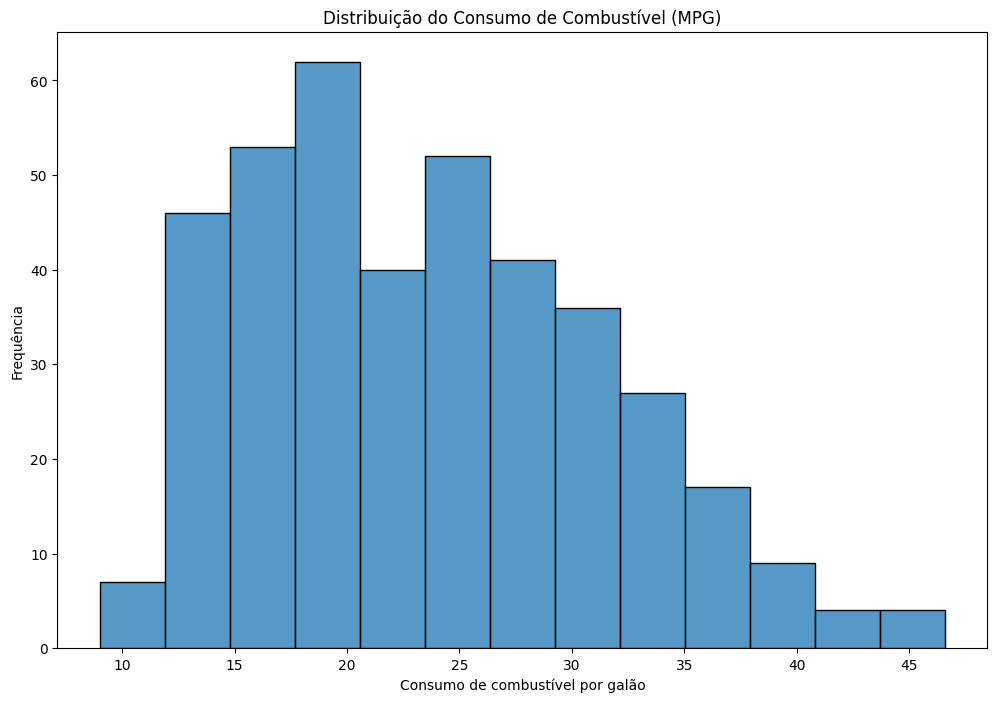

In [5]:
# Visualização para demonstração de como as variáveis estão distribuídas 

# Bibliotecas para criação e manipulação de gráficos  
import matplotlib.pyplot as plt
import seaborn as sns 

# Histograma para a variável alvo Milles Per Gallon (Milhas por Galão) - que indica o quão econômico é o veículo 
plt.figure(figsize=(12, 8))
sns.histplot(data=df["mpg"])
plt.title("Distribuição do Consumo de Combustível (MPG)")
plt.xlabel("Consumo de combustível por galão")
plt.ylabel("Frequência")
plt.show()

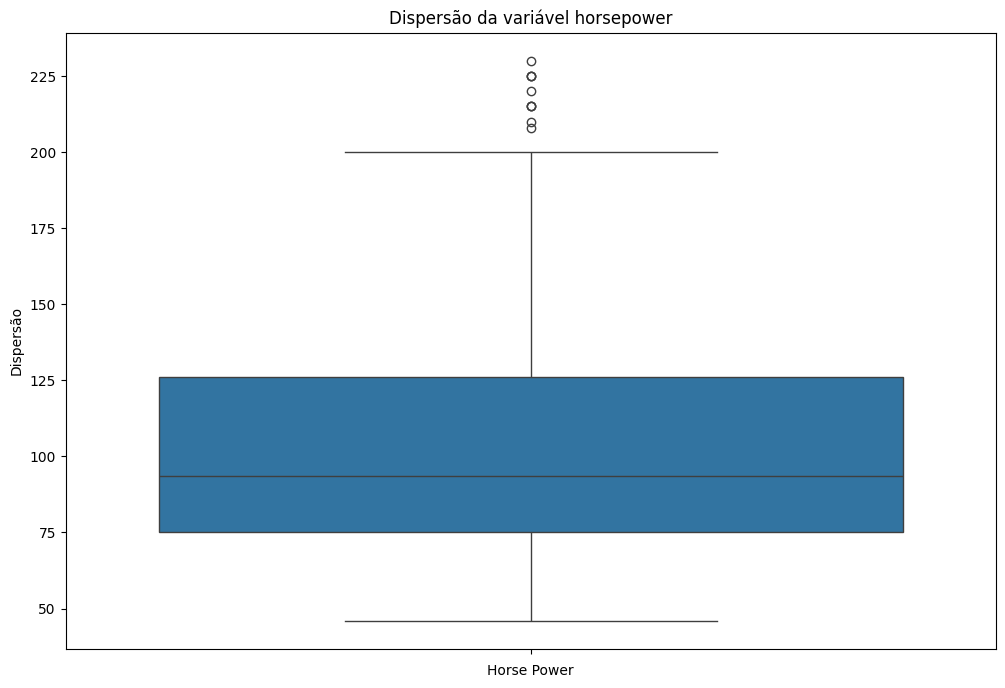

In [6]:
# Boxplot na coluna horsepower - verifica a dispersão dos dados dos veículos 
plt.figure(figsize=(12, 8))
sns.boxplot(data=df["horsepower"])
plt.title("Dispersão da variável horsepower")
plt.xlabel("Horse Power")
plt.ylabel("Dispersão")
plt.show()

In [7]:
# Verificando a relação entre as variável independentes e a variável alvo  
labels = df.iloc[:, :-1] # Remove o rótulo do dataset 
matriz_correlacao = labels.corr() # Matriz de correlação 
matriz_correlacao

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.455171,-0.581024,0.205873,0.180662,1.000000


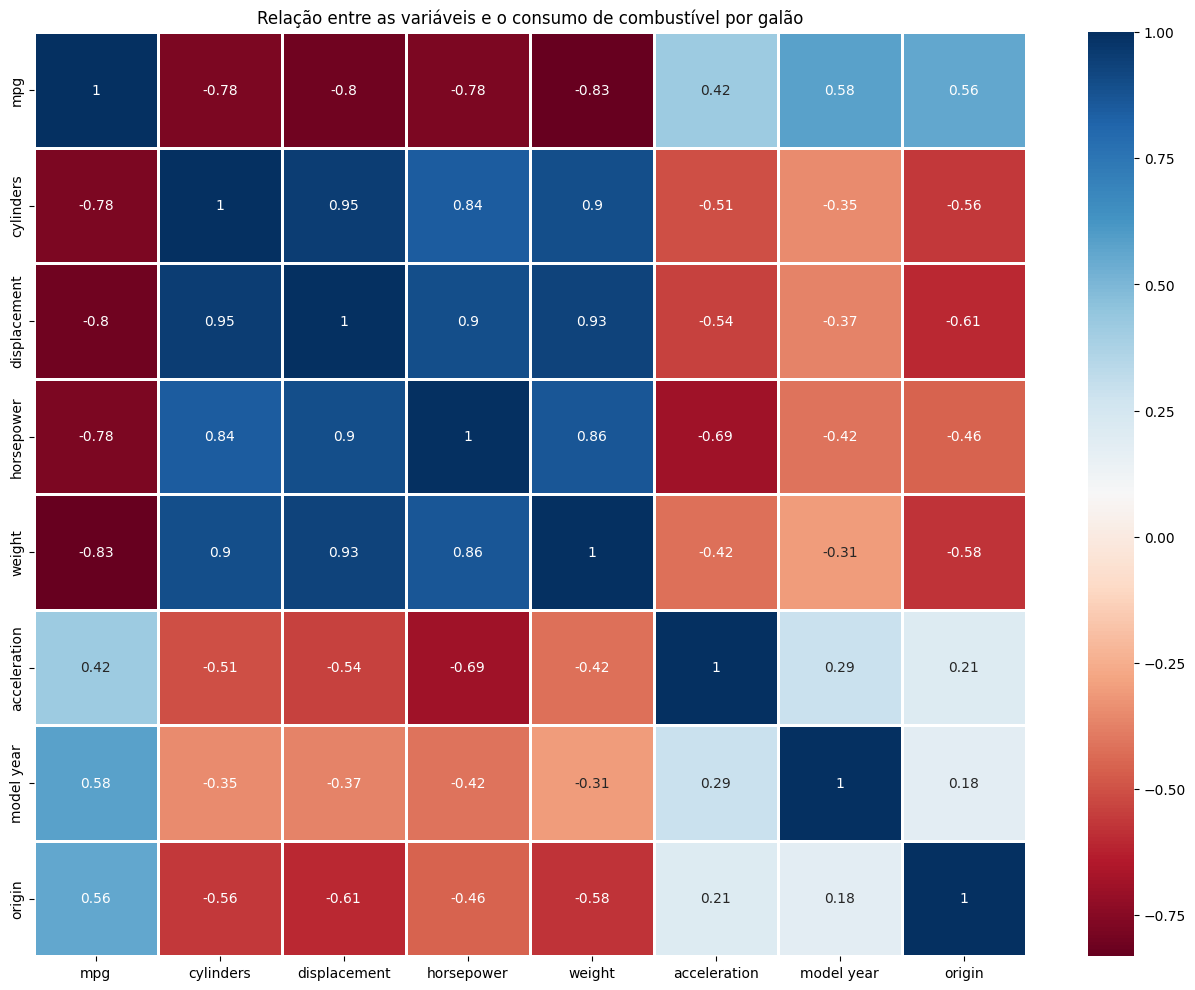

In [8]:
# Visualização da matriz de correlação através de um heatmap 
plt.figure(figsize=(16, 12))
sns.heatmap(matriz_correlacao, 
            xticklabels=df.columns[:-1], 
            yticklabels=df.columns[:-1], 
            annot=True, 
            linewidth=2, 
            cmap="RdBu")
plt.title("Relação entre as variáveis e o consumo de combustível por galão")
plt.show()

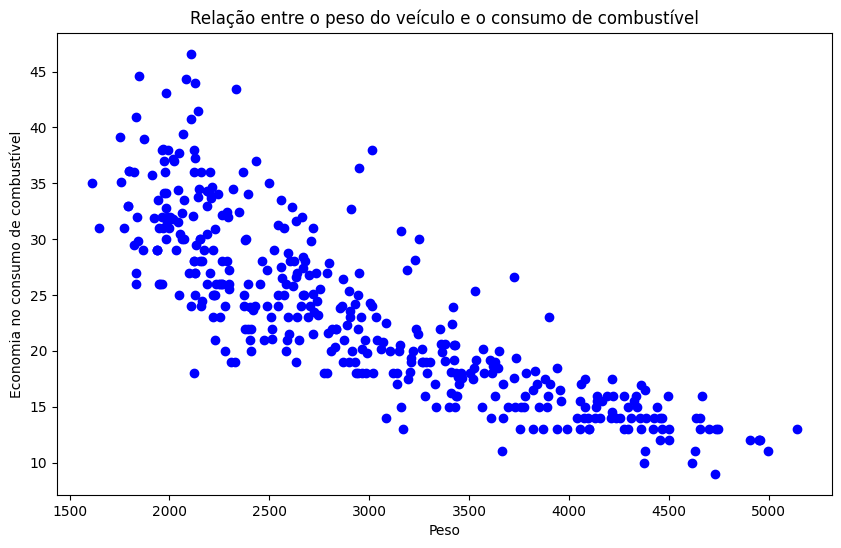

In [9]:
# Fase 3 - Machine Learning: Aplicação de Regressão Linear 

# ! Regressão Linear simples aplicada manualmente 

X = df["weight"] # Feature
y = df["mpg"] # Label

plt.figure(figsize=(10, 6))
plt.scatter(x=X, y=y, color="blue")
plt.title("Relação entre o peso do veículo e o consumo de combustível")
plt.xlabel("Peso")
plt.ylabel("Economia no consumo de combustível")
plt.show()


In [10]:
# Exibir a média de todos os valores de y
y_mean = y.mean()

print(f"Média dos valores de y {y_mean:.2f}")

Média dos valores de y 23.51


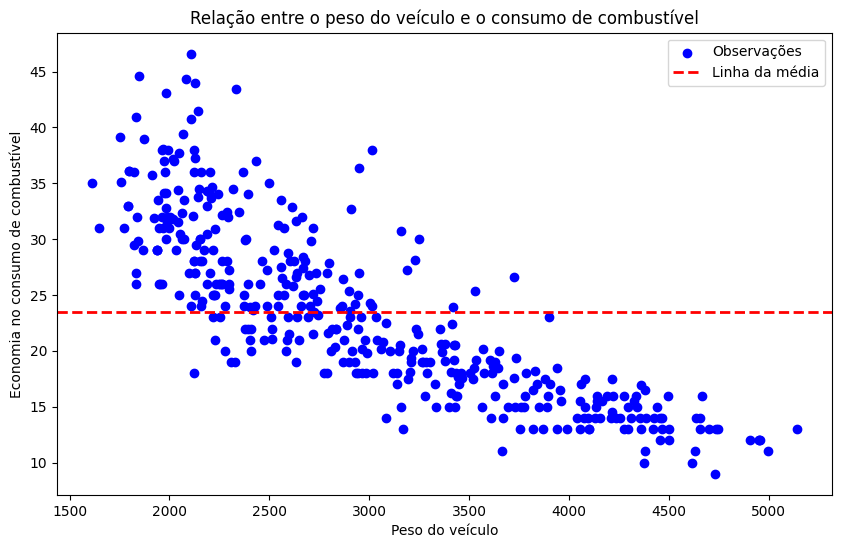

In [11]:
# Traçando a linha de regressão no ponto médio do eixo y
plt.subplots(1, 1, figsize=(10, 6))
plt.scatter(x=X, y=y, color="blue", label="Observações")
plt.axhline(y=y_mean, color="red", linewidth=2, linestyle="dashed", label="Linha da média")
plt.title("Relação entre o peso do veículo e o consumo de combustível")
plt.xlabel("Peso do veículo")
plt.ylabel("Economia no consumo de combustível")
plt.legend()
plt.show()

In [12]:
# Sum Squared Total - SST
sst = sum((y-y_mean)**2)
print(f"Soma dos Quadrados Totais: {sst:.2f}")
# Mean Squad Error - MSE 
mse = sst / len(y)
print(f"Erro Quadrado Médio: {mse:.2f}")

Soma dos Quadrados Totais: 24252.58
Erro Quadrado Médio: 60.94


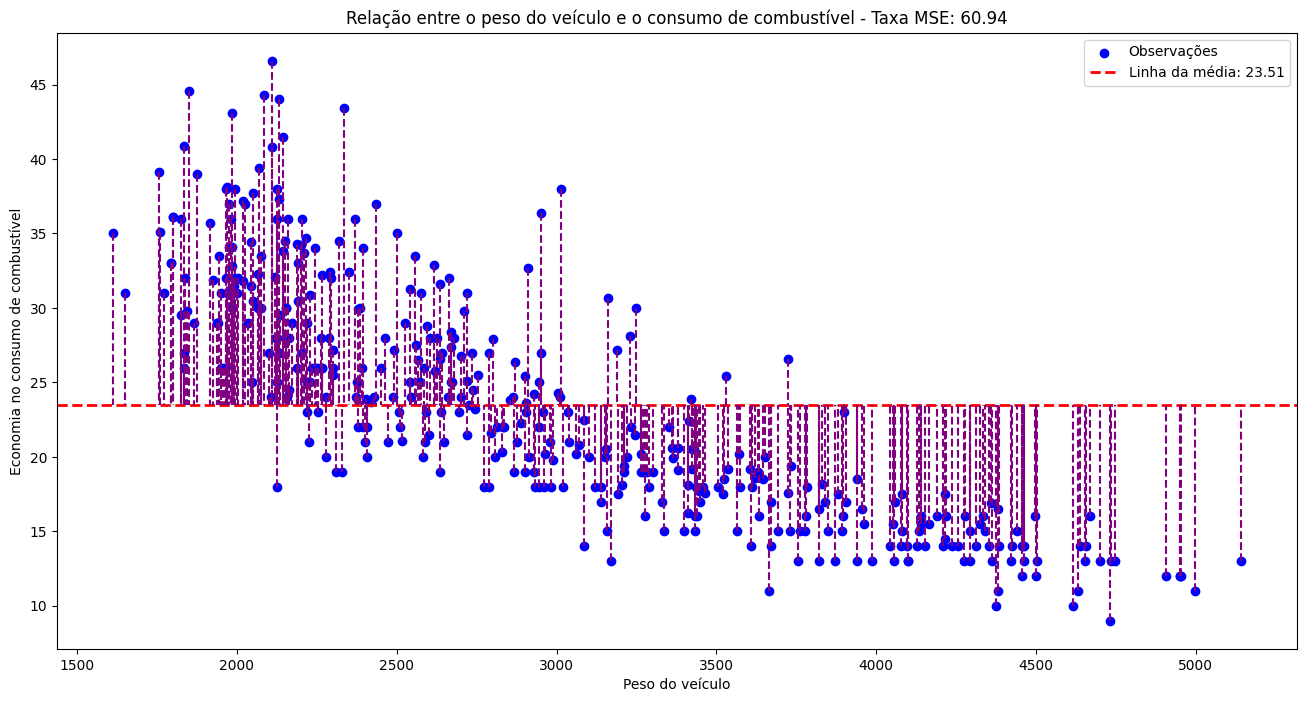

In [13]:
# Plotando o MSE 
plt.figure(figsize=(16, 8))
plt.scatter(x=X, y=y, color="blue", label="Observações")
plt.axhline(y_mean, color="red", linewidth=2, linestyle="dashed", label=f"Linha da média: {y_mean:.2f}")
for i in range(len(X)): 
    plt.plot([X[i], X[i]], [y[i], y_mean], color="purple", linestyle="dashed")
plt.legend()
plt.title(f"Relação entre o peso do veículo e o consumo de combustível - Taxa MSE: {mse:.2f}")
plt.xlabel("Peso do veículo")
plt.ylabel("Economia no consumo de combustível")
plt.show()

In [14]:
# Ajustando o modelo 
# ! Método Mínimos Quadrados - Busca ajustar a melhor reta de modo que o MSE seja o menor possível 

# Encontrando o valor dos coeficientes de interseção e inclinação
x_mean = X.mean()
inclinacao = sum((X - x_mean) * (y - y_mean)) / sum((X - x_mean)**2)
intersecao = y_mean - (inclinacao * x_mean)

print(f"Inclinação (beta_1): {inclinacao:.2f}")
print(f"Interseção (beta_0): {intersecao:.2f}")

Inclinação (beta_1): -0.01
Interseção (beta_0): 46.32


Soma dos Quadrados dos Resíduos: 7474.81
Soma dos Quadrados dos Totais: 24252.58
Média dos Quadrados dos Resíduos: 60.94
Coeficiente de Determinação: 0.69


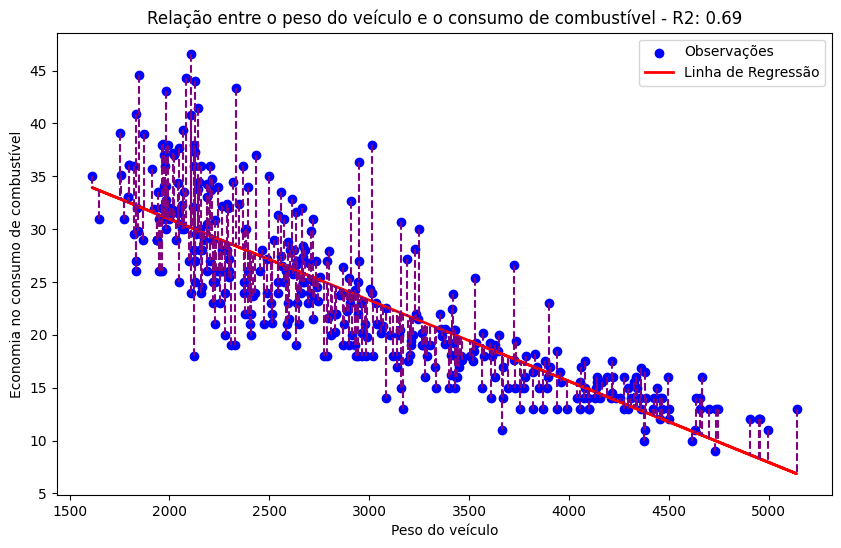

In [26]:
# SSR (Sum Squares Residuals) após o ajuste do modelo 

# Fórmula da regressão linear simples
y_pred = intersecao + (inclinacao * X)

ssr = sum((y - y_pred)**2)
print(f"Soma dos Quadrados dos Resíduos: {ssr:.2f}") 
print(f"Soma dos Quadrados dos Totais: {sst:.2f}")
print(f"Média dos Quadrados dos Resíduos: {mse:.2f}")

# Coeficiente de Determinação - mede a variabilidade no conjunto de observações 
r2 = 1 - (ssr/sst)
print(f"Coeficiente de Determinação: {r2:.2f}")

# Plotar o gráfico de dispersão com a reta ajustada ao modelo 
plt.figure(figsize=(10, 6))
plt.scatter(x=X, y=y, color="blue", label="Observações")
plt.plot(X, y_pred, color="red", linewidth=2, label="Linha de Regressão")
for i in range(len(X)): 
    plt.plot([X[i], X[i]], [y[i], y_pred[i]], color="purple", linestyle="dashed")
plt.legend()
plt.title(f"Relação entre o peso do veículo e o consumo de combustível - R2: {r2:.2f}")
plt.xlabel("Peso do veículo")
plt.ylabel("Economia no consumo de combustível")
plt.show()